##### 1. Importing Important Libraries required for the preprocessing

In [1]:
# !pip install textblob

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

##### 2. Loading the CSV into a pandas dataframe and reviewing the data

In [3]:
sst_df = pd.read_csv("dataset3.csv")

sst_df

,label,sentence
0,0,As fabulous as Maleficent is to look at--and ...
1,0,Directed by Rob Reiner from a screenplay by J...
2,0,Parental Content Review
3,0,"The movie's motives might be admirable, but i..."
4,0,"After a while, all these odious, yammering pe..."
...,...,...
119998,0,"Characterization and emotional investment, ho..."
119999,1,Despite its lack of context and repetitive st...
120000,0,How anyone else could sit through its 2 1/2 h...
120001,0,Resurrecting some dead characters from the pr...


##### 3. Checking the Data for any null values and removing them (if they exist)

In [4]:
sst_df.isnull().sum()

label       0
sentence    0
dtype: int64

##### 4. Checking the Data for duplicate rows

In [5]:
sst_df.duplicated(keep="first").sum()

10645

##### 5. Removing the duplicates from the dataframe

In [6]:

sst_df = sst_df.drop_duplicates(keep='first')

sst_df.duplicated(keep="first").sum()

0

##### 6. Resetting the indices

In [7]:
sst_df = sst_df.reset_index(drop=True)

sst_df

,label,sentence
0,0,As fabulous as Maleficent is to look at--and ...
1,0,Directed by Rob Reiner from a screenplay by J...
2,0,Parental Content Review
3,0,"The movie's motives might be admirable, but i..."
4,0,"After a while, all these odious, yammering pe..."
...,...,...
109353,1,This movie works beyond just a modern-day fai...
109354,1,There's nothing surprising in the film's aest...
109355,1,An iconic performance packaged in a film good...
109356,0,"Characterization and emotional investment, ho..."


##### 7. Pre-processing Step 1: Convert all reviews to lower case for uniformity

In [8]:
sst_df = sst_df.applymap(lambda s:s.lower() if isinstance(s, str) else s)
sst_df

,label,sentence
0,0,as fabulous as maleficent is to look at--and ...
1,0,directed by rob reiner from a screenplay by j...
2,0,parental content review
3,0,"the movie's motives might be admirable, but i..."
4,0,"after a while, all these odious, yammering pe..."
...,...,...
109353,1,this movie works beyond just a modern-day fai...
109354,1,there's nothing surprising in the film's aest...
109355,1,an iconic performance packaged in a film good...
109356,0,"characterization and emotional investment, ho..."


##### 8. Pre-processing Step 2: Text Normalization

In [9]:
# Tokenization of the text
tokenizer = ToktokTokenizer()
# Creating a list of English stopwords
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### 9. Pre-processing Step 3: Removing stray html strips and textual noise

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Applying function on review column
sst_df['sentence'] = sst_df['sentence'].apply(denoise_text)

C:\Users\ACER\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


##### 10. Pre-processing Step 4: Removing special characters from the text

In [11]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
sst_df['sentence'] = sst_df['sentence'].apply(remove_special_characters)
sst_df

,label,sentence
0,0,as fabulous as maleficent is to look atand it...
1,0,directed by rob reiner from a screenplay by j...
2,0,parental content review
3,0,the movies motives might be admirable but its...
4,0,after a while all these odious yammering peop...
...,...,...
109353,1,this movie works beyond just a modernday fair...
109354,1,theres nothing surprising in the films aesthe...
109355,1,an iconic performance packaged in a film good...
109356,0,characterization and emotional investment how...


##### 11. Pre-processing Step 5: Text Stemming

In [12]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
sst_df['sentence'] = sst_df['sentence'].apply(simple_stemmer)
sst_df

,label,sentence
0,0,as fabul as malefic is to look atand it is fab...
1,0,direct by rob reiner from a screenplay by joey...
2,0,parent content review
3,0,the movi motiv might be admir but it execut is...
4,0,after a while all these odiou yammer peopl sta...
...,...,...
109353,1,thi movi work beyond just a modernday fairi tale
109354,1,there noth surpris in the film aesthet but it ...
109355,1,an icon perform packag in a film good enough t...
109356,0,character and emot invest howev are in disappo...


##### 12. Pre-processing Step 6: Stopword Removal

In [13]:
#set stopwords to english
stop = set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
sst_df['sentence'] = sst_df['sentence'].apply(remove_stopwords)
sst_df

{'theirs', 'about', 'that', 'don', 'is', "needn't", 'as', 'what', "should've", 'and', 'this', 'does', 'here', "couldn't", 'hasn', 'whom', 'she', 'very', 'all', 'me', 'herself', "isn't", 'for', 're', 'ain', 'ma', "weren't", 'his', 'own', 'am', 'through', 'when', 'with', 'aren', "hadn't", "that'll", 'if', 'than', 'against', 'until', 'these', 'after', "you're", "haven't", 'the', 'they', 'myself', 'my', 'them', 'once', 'mustn', 'your', 'has', "it's", 't', 'ourselves', 'from', 'out', 'mightn', 'd', 'll', 'couldn', 'up', 'under', 'her', 'its', 'while', 'wouldn', 'do', 'who', 'down', 'into', "you'd", 'shouldn', 'yourselves', 'you', 'needn', 'to', 'o', 'were', 'below', 'during', 'have', 'doing', 'which', 'too', "won't", "hasn't", 'weren', 'being', 'at', 'by', 'both', 'ours', 'then', 'hadn', 'it', 'shan', 'few', 'between', 'didn', 'in', "wasn't", 'there', 'should', 'not', 'having', 'himself', 'hers', 'most', 'i', "aren't", 'won', 'isn', 'such', 'm', 'off', 'an', 'each', "shouldn't", "don't", 'o

,label,sentence
0,0,fabul malefic look atand fabulousth film sacri...
1,0,direct rob reiner screenplay joey hartston mov...
2,0,parent content review
3,0,movi motiv might admir execut bog impenetr old...
4,0,odiou yammer peopl start sound lot like charli...
...,...,...
109353,1,thi movi work beyond modernday fairi tale
109354,1,noth surpris film aesthet execut admir skill v...
109355,1,icon perform packag film good enough support
109356,0,character emot invest howev disappointingli sh...


##### 13. Pre-processing Step 7: Performing the train-test split

In [14]:
sst_df_train = sst_df[:6000]
sst_df_test = sst_df[6000:]
print(sst_df_train)
print(sst_df_test)

      label                                           sentence
0         0  fabul malefic look atand fabulousth film sacri...
1         0  direct rob reiner screenplay joey hartston mov...
2         0                              parent content review
3         0  movi motiv might admir execut bog impenetr old...
4         0  odiou yammer peopl start sound lot like charli...
...     ...                                                ...
5995      0                             parent would like love
5996      0  movi constantli explain night shyamalan ladi w...
5997      0  space us attempt take young love liter new hei...
5998      1                     visual happi feet absolut amaz
5999      1  kosinski person commit gorgeou artific abov co...

[6000 rows x 2 columns]
        label                                           sentence
6000        1  visitor lowkey naturalist beauti observ charac...
6001        1  bryan cranston shine thi remark true stori one...
6002        0  okja admi

##### 14. Pre-processing Step 8: Vectorization using TfidfVectorizer

In [15]:
n_train_reviews=sst_df_train.sentence
n_test_reviews=sst_df_test.sentence

#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(n_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(n_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (6000, 128441)
Tfidf_test: (103358, 128441)


##### 15. Pre-processing Step 9: Labelling and Splitting the Sentiment Data

In [16]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sst_sentiment_data=lb.fit_transform(sst_df['label'])
print(sst_sentiment_data.shape)
#Spliting the sentiment data
train_sentiments=sst_sentiment_data[:40000]
test_sentiments=sst_sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

(109358, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


##### 16. Data Visualization: Inspecting Percentages from the Pie Chart

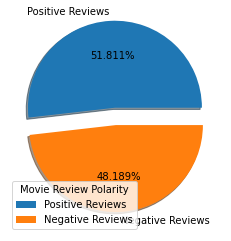

In [17]:
nparr = np.array(list(sst_df['label'].value_counts()))
sst_labels = ['Positive Reviews', 'Negative Reviews']
plt.pie(nparr, labels=sst_labels, autopct='%1.3f%%', explode=[0.2, 0], shadow=True)
plt.legend(title="Movie Review Polarity", loc="lower left")
plt.show()

From the above Pie chart, it can be inferred that the dataset is relatively balanced not if, slightly imbalanced

Since the information provided is rather low regarding the sentiment, knowing the balance of the dataset should be enough to proceed onto the modelling

##### 17. Saving the cleaned data

In [19]:
#converting dataframe to a csv file
sst_df.to_csv("dataset3_cleaned.csv", index=False)